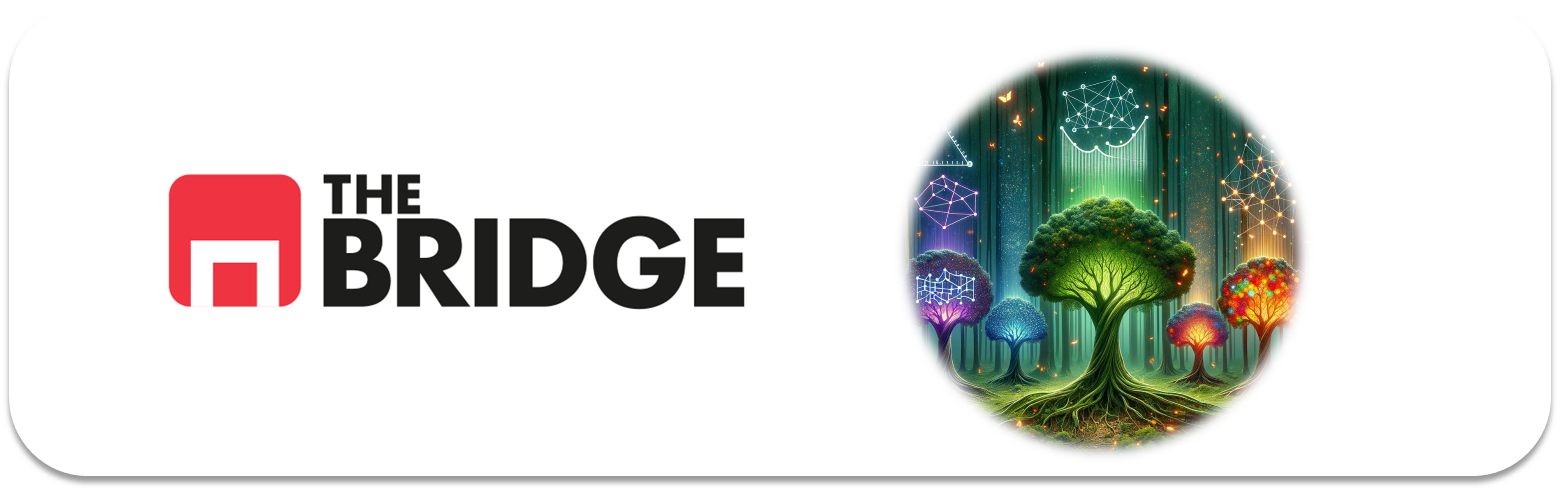

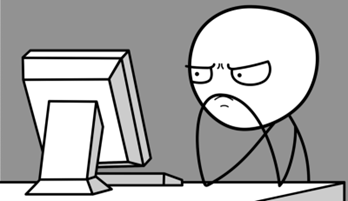

Para ejercitarte y afianzar lo aprendido sobre **Clasificacion con Árboles de decisión**, completa los siguientes ejercicios. Recuerda que necesitarás datos que están en el directorio data que acompaña al notebook (búscalo en el repositorio de ejercicios)
  
La solución a los mismos las tienes ya, intenta no mirarlos de primeras pero no dejes de hacerlo cuando hayas terminado por si te pudieran aportar.

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook

In [2]:
# Importamos las librerías necesarias
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
import seaborn as sns
from sklearn.model_selection import ShuffleSplit
from scipy.stats import mode



### Ejercicio 1

Genera un conjunto de datos de lunas usando 

```python
make_moons(n_samples=10000, noise=0.4)
```

La función make_moons se encuentra en el módulo `datasets` de `sklearn`. Juega con ella para ver qué tipo de datos genera, y  crea un X_moons y un y_moons. Visualiza las moons con un scatter plot de las dos features de X_moons. (ojo X_moons es un array de numpy de dos dimesiones para acceder a la primera X_moons[:,0] y para la segunda...)

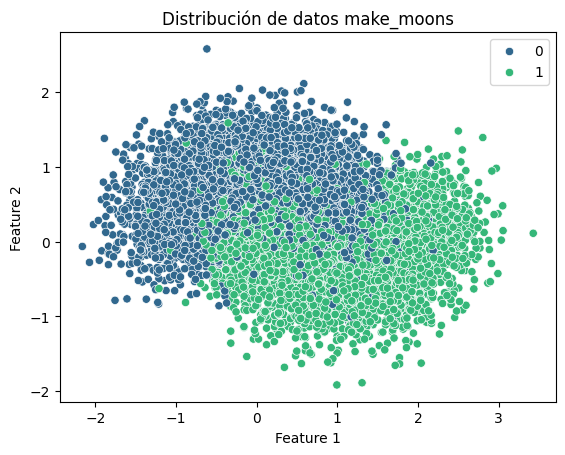

In [3]:
# Generamos los datos con make_moons
X_moons, y_moons = make_moons(n_samples=10000, noise=0.4)

# Visualizamos el scatter plot
sns.scatterplot(x=X_moons[:, 0], y=X_moons[:, 1], hue=y_moons, palette="viridis")
plt.title("Distribución de datos make_moons")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


<Axes: >

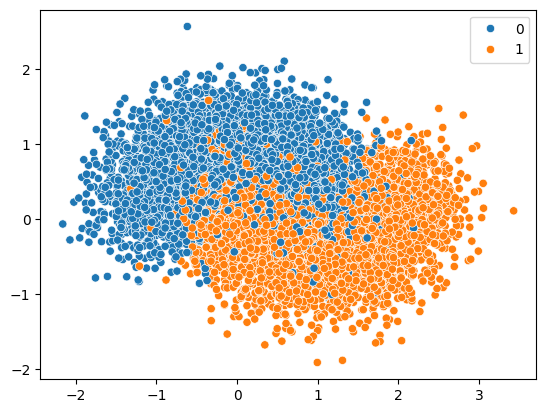

In [4]:
sns.scatterplot(x = X_moons[:,0], y = X_moons[:,1], hue = y_moons)

### Ejercicio 2

El objetivo de los modelos que vamos a ir construyendo es aprender a clasificar correctamente en cada "luna" (moon) a un punto dadas sus coordenadas. Para ello crea un par de juegos X,y para train y test al 20% de test a partir de los puntos generados en el ejercicio anterior.

In [5]:
# Dividimos los datos en entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X_moons, y_moons, test_size=0.2, random_state=42)


### Ejercicio 3

Instancia un árbol de decisión de `sklearn` sin añadir hiperparámetros.

In [6]:
# Instanciamos el árbol de decisión sin hiperparámetros
tree_clf = DecisionTreeClassifier(random_state=42)


### Ejercicio 4

Entrena el árbol y evalúalo contra test, usa para ello el classification_report de `sklearn`

In [7]:
# Entrenamos el árbol
tree_clf.fit(X_train, y_train)

# Realizamos predicciones
y_pred = tree_clf.predict(X_test)

# Evaluamos usando classification_report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.80      0.82      0.81       995
           1       0.81      0.80      0.81      1005

    accuracy                           0.81      2000
   macro avg       0.81      0.81      0.81      2000
weighted avg       0.81      0.81      0.81      2000



### Ejercicio 5

Instancia un nuevo árbol con los hiperparámetros (argumentos del constructor), `max_depth` a 5 y `max_leaf_nodes` a 15. Busca en la documentación de `sklearn` el significado de ambos hiperparámetros.

In [8]:
# Instanciamos un nuevo árbol con hiperparámetros max_depth=5 y max_leaf_nodes=15
tree_clf_optimized = DecisionTreeClassifier(max_depth=5, max_leaf_nodes=15, random_state=42)


### Ejercicio 6

Entrénalo, evaluálo contra test y muestra el resultado a través del classification_report.

In [9]:
# Entrenamos el árbol optimizado
tree_clf_optimized.fit(X_train, y_train)

# Realizamos predicciones
y_pred_optimized = tree_clf_optimized.predict(X_test)

# Evaluamos usando classification_report
print(classification_report(y_test, y_pred_optimized))


              precision    recall  f1-score   support

           0       0.82      0.88      0.85       995
           1       0.87      0.81      0.84      1005

    accuracy                           0.85      2000
   macro avg       0.85      0.85      0.85      2000
weighted avg       0.85      0.85      0.85      2000



Comenta el resultado

*La mejor es sensible, debido a que el ajuste de hiperparámetros ha sido bastante bueno. En general los modelos basados en árboles necesitan un ajuste más fino que las regresiones (lineal, que apenas hay que hacer nada, y logística)*

### Ejercicio 7

Genera 1000 subconjuntos a partir del X_train, cada uno con 100 instancias seleccionadas aleatoriamente. Pista: Revisa la clase `ShuffleSplit` de `sklearn` para ayudarte con esto

In [10]:
# Creamos 1000 subconjuntos usando ShuffleSplit
subsets = list(ShuffleSplit(n_splits=1000, test_size=100, random_state=42).split(X_train))


### Ejercicio 8

Entrena un árbol de decisión por cada subconjunto anterior (ve acumulándolos en una lista, llámala "bosque" o "forest"). Emplea como hiperparámetros los del ejercicio 5.

In [11]:
# Entrenamos un bosque con los árboles
forest = []
for train_idx, _ in subsets:
    X_subset, y_subset = X_train[train_idx], y_train[train_idx]
    tree = DecisionTreeClassifier(max_depth=5, max_leaf_nodes=15, random_state=42)
    tree.fit(X_subset, y_subset)
    forest.append(tree)




### Ejercicio 9

Evalua cada árbol del bosque contra X_test original en la métrica de `accuracy` y muestra la media de todas las medidas. Emplea para ello `accuracy_score` de `sklearn`. Comenta el resultado.

In [12]:
# Evaluamos cada árbol y calculamos el promedio de accuracies
accuracies = []
for tree in forest:
    y_pred_forest = tree.predict(X_test)
    acc = accuracy_score(y_test, y_pred_forest)
    accuracies.append(acc)

# Promedio de accuracies
print(f"Accuracy promedio del bosque: {np.mean(accuracies):.2f}")


Accuracy promedio del bosque: 0.85


*Como era un poco de esperar un árbol entrenado con menor cantidad de datos no está a la altura de otro entrenado sobre el mismo dataset pero con mayor cantidad de información (81% vs 86%). Es lo que se denomina weak_learner*

### Ejercicio 10

Vamos a hacer un consejo de árboles... Es decir ahora vuelve a predecir las instancias de X_test para cada árbol pero guarda las predicciones en una lista. Es decir crea una lista con los 1000 conjuntos de predicciones (uno por cada árbol)

In [13]:
# Generamos predicciones individuales por cada árbol
predicciones_list = [tree.predict(X_test) for tree in forest]


### Ejercicio 11

Ahora vamos a construir la predicción final del consejo de árboles mediante un mecanismo de "hard-voting" es decir para cada predicción escoge la clase más votada. Puedes hacerlo recorriendo cada lista de predicciones y contando cual clase tiene más votos y apuntándolo o usando `mode` (la moda) de `scipy`

In [17]:
# Implementamos votación dura con correcciones
from scipy.stats import mode

Y_pred_consejo = []
for i in range(X_test.shape[0]):
    # Extraemos las predicciones para la instancia `i` de cada árbol
    predicciones = [pred[i] for pred in predicciones_list]
    # Calculamos la clase más frecuente (votación dura)
    Y_pred_consejo.append(mode(predicciones, keepdims=True).mode[0])


### Ejercicio 12

Evalua las predicciones del consejo contra y_test y comenta el resultado. Utiliza `accuracy_score`

In [18]:
# Evaluamos la predicción del consejo
print("Accuracy del consejo de árboles:", accuracy_score(y_test, Y_pred_consejo))


Accuracy del consejo de árboles: 0.8455
